In [1]:
from QuantumLib.py import *
from itertools import product

import qutip as q
from scipy.special import comb

from numpy.random import normal
from numpy.linalg import norm
from numpy import exp,sqrt
import numpy as np

ModuleNotFoundError: No module named 'ray'

## Testing equilibration of spin system to theoretical bound
### Defining system


In [ ]:
n= 9
initial_state = tensor([basis(2,0)]*n)
#number of spins

beta0 = lambda n,m: 0

def beta1(n,m):
    if m ==2:
        return 1
    else:
        return 0

In [ ]:
#spin ring
alpha1 = Heisenberg1dRingGen(-1,1,1,n)
H1 = hamiltonian(alpha1,beta0, n)
H1=H1/H1.norm()
assert(H1.isherm)

In [ ]:
#spin ring with external field
alpha1 = Heisenberg1dRingGen(-1,1,1,n)
H1i = hamiltonian(alpha1,beta1, n)
H1i = H1i/H1i.norm()
assert(H1i.isherm)

In [ ]:
#spin ring with external field and added random pertubation
alpha1 = Heisenberg1dRingGen(-1,1,1,n)
H1ir = hamiltonian(alpha1,beta1, n) 

perturbation: Qobj = make_hermitian(rand_unitary(2**n, dims = H1ir.dims))
perturbation = perturbation/perturbation.norm()
epsilon = 0.3

H1ir = H1i/H1i.norm()

H1ir+=epsilon*perturbation
H1ir = H1i/H1i.norm()
assert(H1ir.isherm)

In [ ]:
#random hamiltonian
H2 = make_hermitian(rand_unitary(2**n, dims = H1.dims))
H2= H2/H2.norm()
assert(H2.isherm)

In [ ]:
#spin chain
alpha3 = Heisenberg1dChainGen(-1,0,1,n)
H3 = hamiltonian(alpha3,beta0, n)
H3 = H3/H3.norm()
assert(H3.isherm)

### Simulating

In [ ]:
final_t = 100000
steps = 300

equilibration_analyser(H1,initial_state,final_t,steps)

In [ ]:
final_t = 100000
steps = 300

equilibration_analyser(H1i,initial_state,final_t,steps)

In [ ]:
final_t = 100000
steps = 300

equilibration_analyser(H1ir,initial_state,final_t,steps)

In [ ]:
final_t = 100000
steps = 300

s = time()
equilibration_analyser(H2,initial_state,final_t,steps)
e = time()
print(e-s)

In [ ]:

equilibration_analyser(H3,initial_state,final_t,steps)

## Testing Trace distance vs energy distance for eigenstates of a hamiltonian

In [10]:
n = 10
processsors =4
state1 = tensor([basis(2,0)]*n)

alpha1 = Heisenberg1dRingGen(1,1,1,n)
alpha0 = lambda n,m,i,j: 0
beta1 = lambda n,i : [0,0,1][i]
beta0 = lambda n,i :0

self_interaction = hamiltonian(alpha1,beta0,n)
self_interaction = self_interaction/self_interaction.norm()
external_interaction = hamiltonian(alpha0,beta1,n)
external_interaction = external_interaction/external_interaction.norm()


perturbation: Qobj = make_hermitian(rand_unitary(2**n, dims = self_interaction.dims))
perturbation = perturbation/perturbation.norm()
epsilon = 0.1

H1 = epsilon*self_interaction + external_interaction + epsilon**2*perturbation
H2 = external_interaction
H3 = external_interaction + epsilon*perturbation
H4 = self_interaction + epsilon*external_interaction + epsilon**2*perturbation

### Examining with no pertubation

In [ ]:

xs,ys = energy_trace_compare_p(H2,1,_proc=processsors)


In [ ]:
plt.scatter(xs,ys,s=5)
plt.xlabel("Energy Difference")
plt.ylabel("Trace Distance")
#plt.savefig(f"only_ext_{n}")
plt.show()


#### Examining with pertubation

In [ ]:

xs,ys = energy_trace_compare_p(H3,1,_proc=processsors)


In [ ]:
plt.scatter(xs,ys,s=1)
plt.xlabel("Energy Difference")
plt.ylabel("Trace Distance")
#plt.savefig("ext_per_8")
plt.show()

#### Examining with pertubation and interaction terms


In [2]:
xs,ys = energy_trace_compare_p(H1,1,_proc=processors)

NameError: name 'energy_trace_compare_p' is not defined

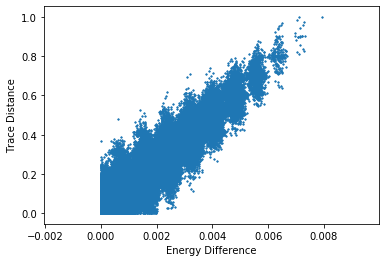

In [12]:
plt.scatter(xs,ys,s=1)
plt.xlabel("Energy Difference")
plt.ylabel("Trace Distance")
#plt.savefig("ext_inter_8")
plt.show()

### Examining mainly interaction with external field and random pertubation

In [9]:
xs,ys = energy_trace_compare_p(H4,1,_proc=processors)

65536it [01:16, 858.22it/s]


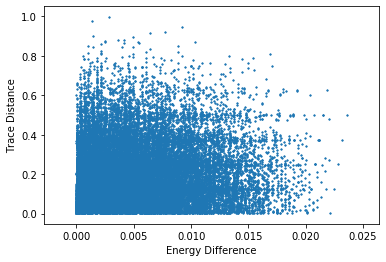

In [10]:
plt.scatter(xs,ys,s=1)
plt.xlabel("Energy Difference")
plt.ylabel("Trace Distance")
plt.savefig("inter_ext_8")
plt.show()

## Examining  tracing onto different number of spins  (1,2,3 spins)

In [6]:
xs, ys = energy_trace_compare_p(H1,1,_proc=processors)

65536it [04:00, 272.39it/s]


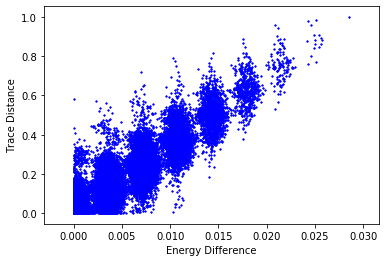

In [7]:
plt.scatter(xs,ys,s=1, c="b")
plt.xlabel("Energy Difference")
plt.ylabel("Trace Distance")
plt.savefig("1subEvTr8S")
plt.show()

In [5]:
xs, ys = energy_trace_compare_p(H1,2,_proc=processors)

65536it [01:11, 919.18it/s]


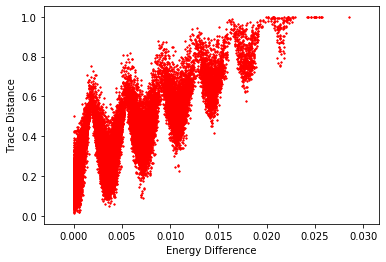

In [10]:
plt.scatter(xs,ys,s=1, c='r')
plt.xlabel("Energy Difference")
plt.ylabel("Trace Distance")
plt.savefig("2subEvTr8S")
plt.show()

In [ ]:
xs, ys = energy_trace_compare_p(H1,3,_proc=processors)

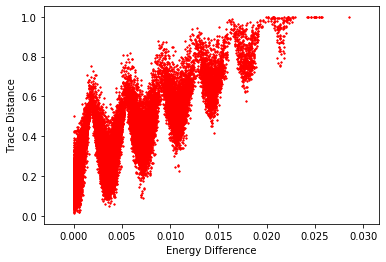

In [10]:
plt.scatter(xs2,ys2,s=1, c='y')
plt.xlabel("Energy Difference")
plt.ylabel("Trace Distance")
plt.savefig("3subEvTr8S")
plt.show()

## Altering Size of Sytem

In [16]:
n = 10 # <-- change this number to generate different plots
state1 = tensor([basis(2,0)]*n)

alpha1 = Heisenberg1dRingGen(1,1,1,n)
alpha0 = lambda n,m,i,j: 0
beta1 = lambda n,i : [0,0,1][i]
beta0 = lambda n,i :0

self_interaction = hamiltonian(alpha1,beta0,n)
self_interaction = self_interaction/self_interaction.norm()
external_interaction = hamiltonian(alpha0,beta1,n)
external_interaction = external_interaction/external_interaction.norm()


perturbation: Qobj = make_hermitian(rand_unitary(2**n, dims = self_interaction.dims))
perturbation = perturbation/perturbation.norm()
epsilon = 0.1

H1 = epsilon*self_interaction + external_interaction + epsilon**2*perturbation

In [ ]:
xs, ys = energy_trace_compare_p(H1,1,_proc=processors)

631421it [12:11, 772.85it/s]

In [ ]:
plt.scatter(xs,ys,s=1, c='y')
plt.xlabel("Energy Difference")
plt.ylabel("Trace Distance")
plt.savefig("sys10TrVsE")
plt.show()

### Examining Eigenstates grouping with and without pertubation

In [10]:
n = 10
processsors =4
state1 = tensor([basis(2,0)]*n)

alpha1 = Heisenberg1dRingGen(1,1,1,n)
alpha0 = lambda n,m,i,j: 0
beta1 = lambda n,i : [0,0,1][i]
beta0 = lambda n,i :0

self_interaction = hamiltonian(alpha1,beta0,n)
self_interaction = self_interaction/self_interaction.norm()
external_interaction = hamiltonian(alpha0,beta1,n)
external_interaction = external_interaction/external_interaction.norm()


perturbation: Qobj = make_hermitian(rand_unitary(2**n, dims = self_interaction.dims))
perturbation = perturbation/perturbation.norm()
epsilon = 0.1

H1 = epsilon*self_interaction + external_interaction + epsilon**2*perturbation
H2 = external_interaction
H3 = external_interaction + epsilon*perturbation
H4 = self_interaction + epsilon*external_interaction + epsilon**2*perturbation

In [ ]:
#without
plt.hist(H2.eigenenergies(),bins=100)
plt.xlabel("Energy")
plt.ylabel("#states")
plt.savefig("Unperturbed energies ")
plt.show()

In [ ]:
#with
plt.hist(H3.eigenenergies(),bins=100)
plt.xlabel("Energy")
plt.ylabel("#states")
plt.savefig("Perturbed energies ")
plt.show()

In [225]:
zero_band_energies  = list(filter(lambda val: -0.0025<val<0.0025 ,H3.eigenenergies()))

## Plotting analytical vs experiemntal average trace distacne against n

In [16]:
#Exact value of distance without bounding

def bound_func(nb,ns,n0):
    n = nb+ns
    d = comb(n,n0)
    beta = 2/(d**2-1)
    alpha = beta * -1/(d)
    lhsum = sum(comb(nb,n0-x)**2*comb(ns,x) for x in range(min(ns,n0)+1))
    rhsum  = sum(comb(nb,n0-x)*comb(ns,x)**2 for x in range(min(ns,n0)+1))
    return sqrt((2**ns)/4)*sqrt(alpha*lhsum+ beta*rhsum) 


def approx_bound(nb,ns,n0):
    n = nb+ns
    d = comb(n,n0)
    ds = 2**ns
    return sqrt((d*ds**2)/(2*(d**2-1)))
    

In [ ]:
bounds =[[-0.05,0.05,2],[-0.025,0,2],[-0.01,0.01,3],[-0.01,0,3],[-0.0025,0.0025,4],[-0.002,0,4],[-0.0005,0.0005,5],[-0.0004,0,5],[-0.0001,0.0001,6]]

experimental = []

analytical =[]

approx =[]

for ind, bound in enumerate(bounds[:6]):
    n = 4+ind
    alpha0 = lambda n,m,i,j: 0
    beta1 = lambda n,i : [0,0,1][i]
    external_interaction = hamiltonian(alpha0,beta1,n)
    external_interaction = external_interaction/external_interaction.norm()
    perturbation: Qobj = make_hermitian(rand_unitary(2**n, dims = external_interaction.dims))
    perturbation = perturbation/perturbation.norm()
    epsilon = 0.1
    H3 = external_interaction + epsilon*perturbation
    energies,states = H3.eigenstates()
    energy_state = zip(energies,states)
    energy_state = list(energy_state)
    zero_energy_states = list(filter(lambda val: bound[0]<val[0]<bound[1] ,energy_state))
    print(len(zero_energy_states))
    difference = 0
    count = 0


    for state1,state2 in tqdm(product(zero_energy_states,zero_energy_states)):
        if state1!=state2:
            difference+=tracedist(state1[1].ptrace(0),state2[1].ptrace(0))
            count+=1
    
    experimental.append(difference/count)
    analytical.append(bound_func(n-1,1,bound[2]))
    approx.append(approx_bound(n-1,1,bound[2]))

6


36it [00:00, 300.80it/s]


10


100it [00:00, 316.30it/s]


20


400it [00:01, 284.24it/s]


35


1225it [00:04, 283.67it/s]


70


4900it [00:17, 280.94it/s]


126


3409it [00:11, 229.02it/s]

In [ ]:
    
plt.plot(range(4,10),experimental, label = "Numerical Simulation")
plt.plot(range(4,10),analytical , label = "Analytical")
plt.plot(range(4,10),approx, label = "Analytical Approximation ")
plt.legend()
plt.xlabel("Spin number")
plt.ylabel(r"$\langle TrDist(\Delta_1,\Delta_2) \rangle$")
plt.savefig("TrVsSpinRedUnitGroup")
plt.show()
    
    

## Plotting Energy level diagram

In [4]:
n = 8
state1 = tensor([basis(2,0)]*n)

alpha1 = Heisenberg1dRingGen(1,1,1,n)
alpha0 = lambda n,m,i,j: 0
beta1 = lambda n,i : [0,0,1][i]
beta0 = lambda n,i :0

self_interaction = hamiltonian(alpha1,beta0,n)
self_interaction = self_interaction/self_interaction.norm()
external_interaction = hamiltonian(alpha0,beta1,n)
H2u = external_interaction
external_interaction = external_interaction/external_interaction.norm()


perturbation: Qobj = make_hermitian(rand_unitary(2**n, dims = self_interaction.dims))
perturbation = perturbation/perturbation.norm()
I_epsilon = 0.1
P_epsilon = 0.3

H1 = I_epsilon*self_interaction + external_interaction + P_epsilon**2*perturbation
H2 = external_interaction
H3 = external_interaction + P_epsilon*perturbation
H4 = external_interaction + I_epsilon*self_interaction



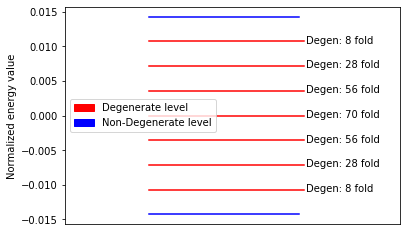

In [5]:
energy_band_plot(H2, "", "EplotE")

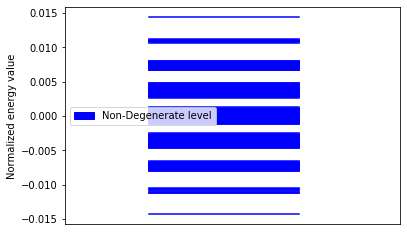

In [6]:
energy_band_plot(H3, "",  "EplotEP")

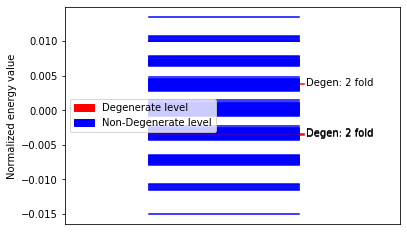

In [7]:
energy_band_plot(H4, "", "EplotI")

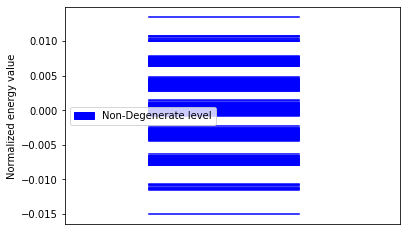

In [8]:
energy_band_plot(H1, "", "EplotIP")